In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [4]:
numerical_cols = [col for col in list(df.columns) if df[col].dtype in ['int64', 'float64']]

In [5]:
numerical_cols

['id',
 'Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Premium Amount']

In [6]:
categorical_cols = [col for col in list(df.columns) if df[col].dtype == 'object']

In [7]:
categorical_cols

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Policy Start Date',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [8]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1200000 non-null  int64         
 1   Age                   1181295 non-null  float64       
 2   Gender                1200000 non-null  object        
 3   Annual Income         1155051 non-null  float64       
 4   Marital Status        1181471 non-null  object        
 5   Number of Dependents  1090328 non-null  float64       
 6   Education Level       1200000 non-null  object        
 7   Occupation            841925 non-null   object        
 8   Health Score          1125924 non-null  float64       
 9   Location              1200000 non-null  object        
 10  Policy Type           1200000 non-null  object        
 11  Previous Claims       835971 non-null   float64       
 12  Vehicle Age           1199994 non-null  fl

In [10]:
df['year'] = df['Policy Start Date'].dt.year

In [11]:
df['month'] = df['Policy Start Date'].dt.month
df['day'] = df['Policy Start Date'].dt.day

In [12]:
numerical_cols.extend(['year', 'month', 'day'])

In [13]:
df.isna().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
year                         0
month                        0
day                          0
dtype: int64

In [14]:
df = df.dropna(subset=['Vehicle Age', 'Insurance Duration'])

(array([124480., 121152.,  99311., 127439., 101428., 125452., 126349.,
        101477., 127269., 126931.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

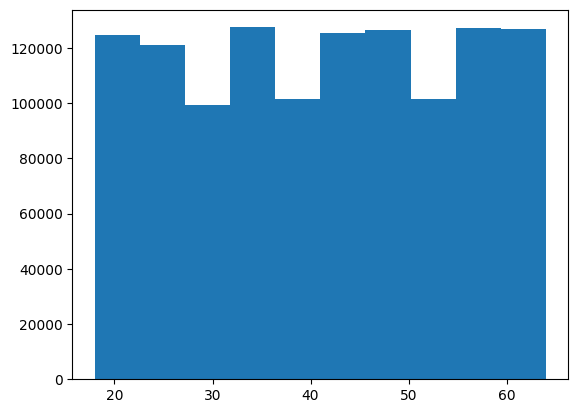

In [15]:
plt.hist(df['Age'])

In [16]:
df['Age'].describe()

count    1.181288e+06
mean     4.114553e+01
std      1.353994e+01
min      1.800000e+01
25%      3.000000e+01
50%      4.100000e+01
75%      5.300000e+01
max      6.400000e+01
Name: Age, dtype: float64

In [17]:
df[numerical_cols].describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,year,month,day
count,1.199993e+06,1.181288e+06,1.155045e+06,1.090321e+06,1.125917e+06,835965.000000,1.199993e+06,1.062111e+06,1.199993e+06,1.199993e+06,1.199993e+06,1.199993e+06,1.199993e+06
mean,6.000005e+05,4.114553e+01,3.274530e+04,2.009931e+00,2.561394e+01,1.002687,9.569882e+00,5.929248e+02,5.018225e+00,1.102544e+03,2.021621e+03,6.492677e+00,1.570618e+01
std,3.464100e+05,1.353994e+01,3.217955e+04,1.417339e+00,1.220344e+01,0.982839,5.776186e+00,1.499820e+02,2.594333e+00,8.649996e+02,1.476009e+00,3.432693e+00,8.811739e+00
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01,2.019000e+03,1.000000e+00,1.000000e+00
25%,3.000010e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591897e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02,2.020000e+03,4.000000e+00,8.000000e+00
50%,6.000010e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457872e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02,2.022000e+03,6.000000e+00,1.600000e+01
75%,9.000000e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03,2.023000e+03,9.000000e+00,2.300000e+01
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03,2.024000e+03,1.200000e+01,3.100000e+01


In [18]:
num_cols_to_impute = [col for col in numerical_cols if df[col].isna().sum() > 0]

In [19]:
num_cols_to_impute

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Credit Score']

In [20]:
df[categorical_cols].head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,Female,Divorced,Master's,NaN,Rural,Comprehensive,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,NaN,Rural,Basic,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House


In [21]:
categorical_cols.remove('Policy Start Date')

## Imputing data

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
simple_imputer = SimpleImputer(strategy='median')

In [24]:
df[numerical_cols] = simple_imputer.fit_transform(df[numerical_cols])

In [25]:
df[numerical_cols].isna().sum()

id                      0
Age                     0
Annual Income           0
Number of Dependents    0
Health Score            0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Premium Amount          0
year                    0
month                   0
day                     0
dtype: int64

In [26]:
df[categorical_cols].describe(include='all')

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
count,1199993,1181464,1199993,841919,1199993,1199993,1122169,1199993,1199993,1199993
unique,2,3,4,3,3,3,3,2,4,3
top,Male,Single,Master's,Employed,Suburban,Premium,Average,Yes,Weekly,House
freq,602566,395389,303817,282746,401537,401845,377903,601868,306179,400347


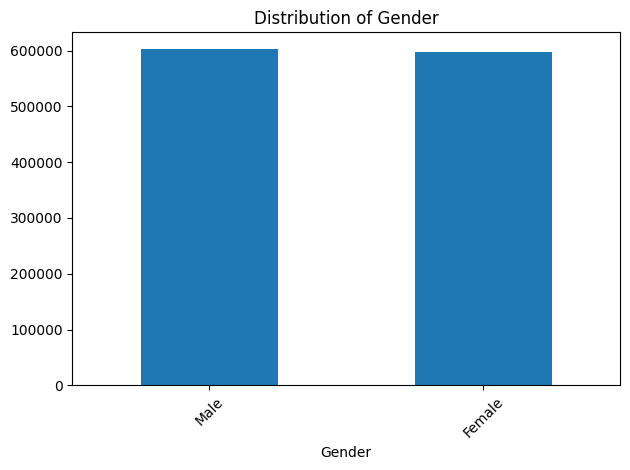

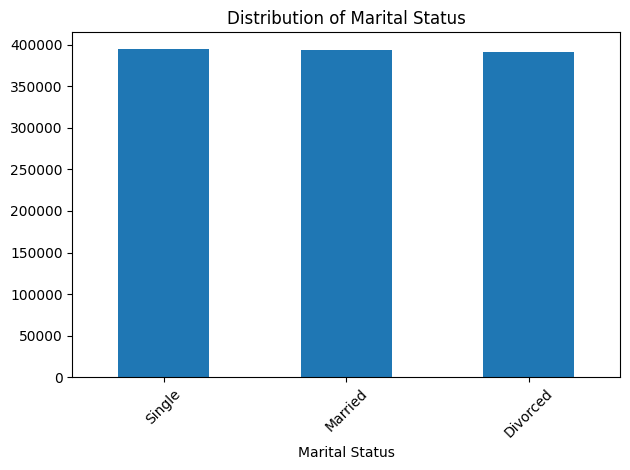

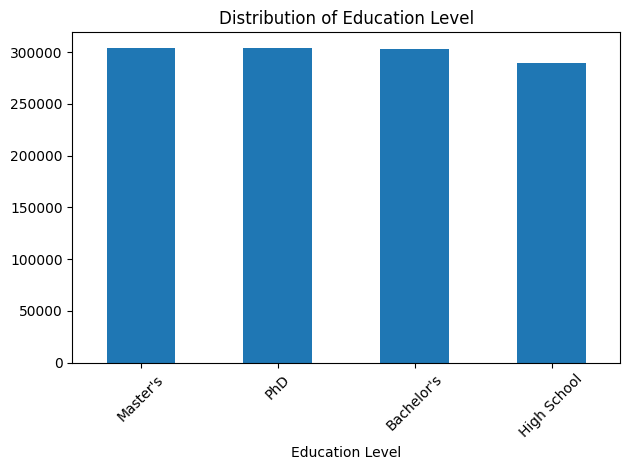

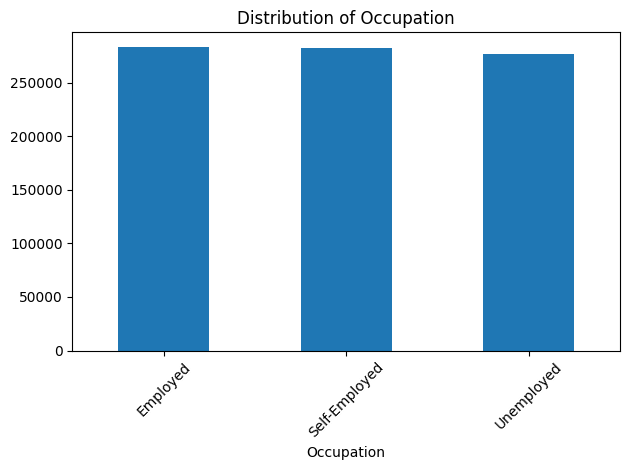

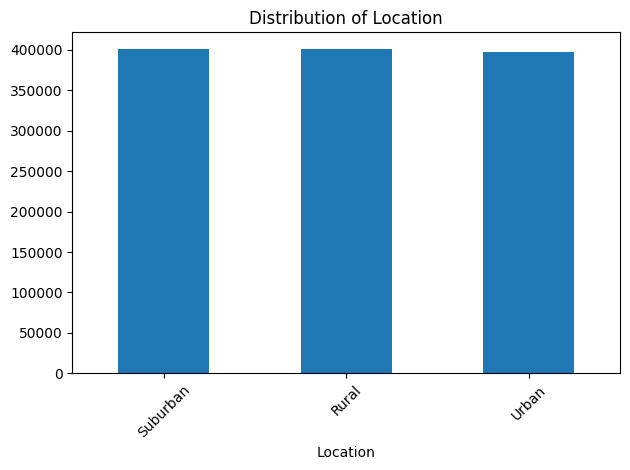

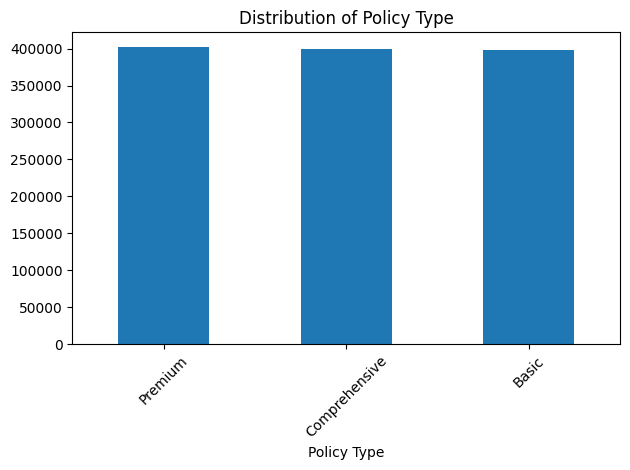

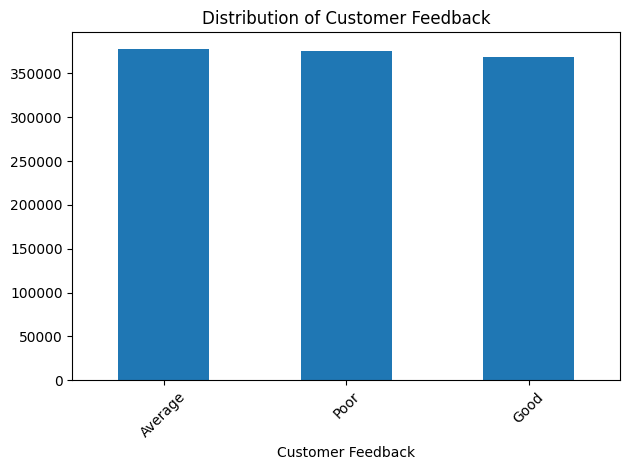

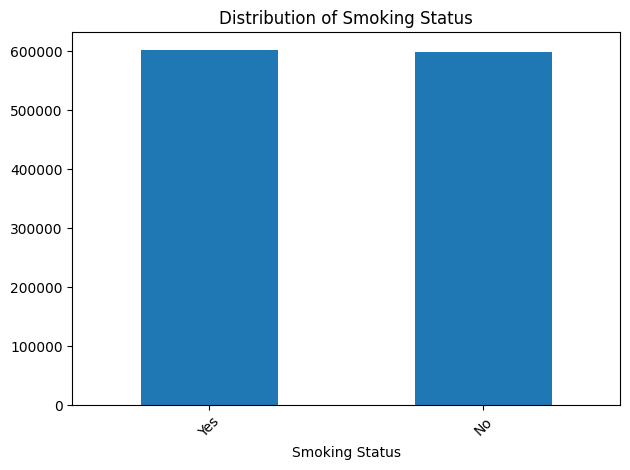

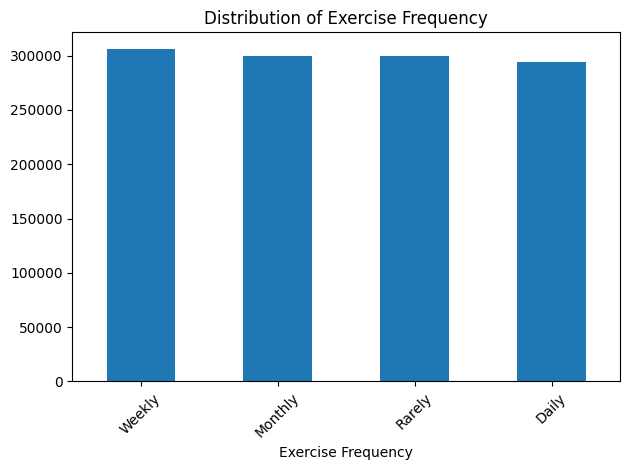

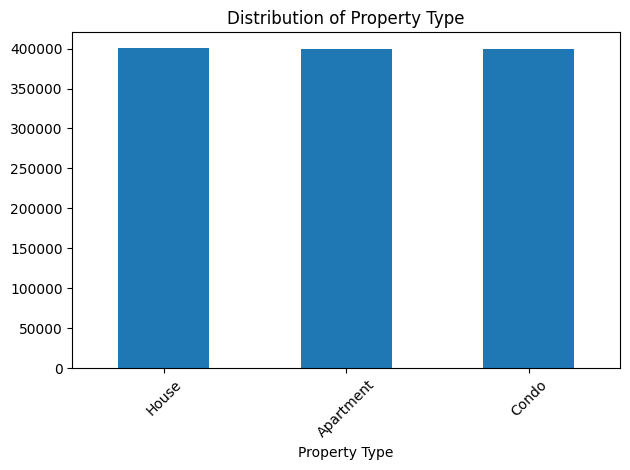

In [27]:
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

All categorical cols are well balanced.

In [28]:
df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'year', 'month', 'day'],
      dtype='object')

In [29]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [30]:
X = df.drop(columns=['id', 'Premium Amount', 'Policy Start Date'])

In [31]:
X.columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'year', 'month', 'day', 'Gender_Male', 'Marital Status_Married',
       'Marital Status_Single', 'Education Level_High School',
       'Education Level_Master's', 'Education Level_PhD',
       'Occupation_Self-Employed', 'Occupation_Unemployed',
       'Location_Suburban', 'Location_Urban', 'Policy Type_Comprehensive',
       'Policy Type_Premium', 'Customer Feedback_Good',
       'Customer Feedback_Poor', 'Smoking Status_Yes',
       'Exercise Frequency_Monthly', 'Exercise Frequency_Rarely',
       'Exercise Frequency_Weekly', 'Property Type_Condo',
       'Property Type_House'],
      dtype='object')

In [32]:
y = df['Premium Amount']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train = simple_imputer.fit_transform(X_train)

In [36]:
X_val = simple_imputer.transform(X_val)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf_model = RandomForestRegressor(random_state=1)

In [39]:
# rf_model.fit(X_train, y_train)

In [40]:
import sklearn
sklearn.__version__

'1.6.0'

In [41]:
from sklearn.metrics import root_mean_squared_log_error